# INFO
- **● time_of_posts** = The time the job was posted on Hipages.
- **● latitudes** = The latitude of the job location,
- **● longitudes** = The longitude of the job location
- **● categorys** = An integer which represents the category for which the job is assigned. A
- **● categorys** (for example, painting, plumbing or air conditioning) allows us to assign the job to tradies who will be interested in the job.
- **● number_of_tradies** = The number of tradies who we can send this job out to.
- **● estimated_size** = The estimated size of the job, this is proportional to the amount
of revenue the tradie might get from the job.
- **● number_of_impressions** = The number of impressions the job gets from the trades.
- **● accepted** = A Boolean which represents if a tradie accepts a job invitation
(meaning that they have indicated to Hipages that they would like us to provide
them with the contact details of the consumer). 1 means at least one tradie was
interested while 0 means no tradie was interested. This is the target variable you
should focus to uncover its causal relationships with the other data.

# Questions

- Does the time-of-day influence if a job would be accepted?
- Can we predict using the data we have if a job would be accepted?
- How effective is estimated size to uncover differences in jobs, tradies, or behaviours?

In [202]:
## Question 1 - Does the time-of-day influence if a job would be accepted?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


jobs = pd.read_csv('Data Analytics Case Study - jobs.csv')

jobs.head(5)

,time_of_post,latitude,longitude,category,number_of_tradies,estimated_size,number_of_impressions,accepted
0,2019-09-15 11:40:06,-37.8994,144.9799,8,8376,medium,1004.0,0
1,2019-09-11 15:12:06,-37.8063,144.9964,3,5089,medium,772.0,0
2,2019-09-10 15:53:06,-37.8901,144.8885,7,3677,small,1103.0,0
3,2019-09-10 11:38:06,-33.7674,151.1690,3,9732,medium,1111.0,1
4,2019-09-10 17:38:06,-33.9091,151.2039,6,2476,small,360.0,0


In [203]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   time_of_post           9999 non-null   object 
 1   latitude               9999 non-null   float64
 2    longitude             9999 non-null   float64
 3   category               9999 non-null   int64  
 4   number_of_tradies      9999 non-null   int64  
 5   estimated_size         9999 non-null   object 
 6   number_of_impressions  9889 non-null   float64
 7   accepted               9999 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 625.1+ KB


In [204]:
jobs.describe()

,latitude,longitude,category,number_of_tradies,number_of_impressions,accepted
count,9999.000000,9999.000000,9999.000000,9999.000000,9889.000000,9999.000000
mean,-34.613654,146.508822,4.819982,4225.784678,1015.828901,0.263626
std,4.786739,7.078573,1.857602,3020.932017,481.730727,0.440621
min,-38.221600,121.939400,1.000000,355.000000,-745.000000,0.000000
25%,-37.799350,144.937650,3.000000,1627.000000,689.000000,0.000000
50%,-34.000800,145.138800,5.000000,3677.000000,1007.000000,0.000000
75%,-33.841800,151.206350,6.000000,7267.000000,1339.000000,1.000000
max,-17.548400,151.542900,9.000000,10000.000000,3245.000000,1.000000


In [205]:
#Convert time_of_post to Date Time

jobs['time_of_post'] = pd.to_datetime(jobs['time_of_post'])

In [206]:
jobs['accepted'].value_counts()

0    7363
1    2636
Name: accepted, dtype: int64

In [207]:
#Extract Hour of Post, Day of Post

jobs['hour_of_post']= jobs['time_of_post'].dt.hour
jobs['day_of_post'] = jobs['time_of_post'].dt.weekday

In [208]:
# Categorize time into parts of the day to create period_of_post feature

def categorise_time(time):
    if 6 <= time.hour < 12:
        return 'Morning'
    elif 12 <= time.hour < 17:
        return 'Afternoon'
    elif 17 <= time.hour < 21:
        return 'Evening'
    elif 21 <= time.hour < 24:
        return 'LateNight'
    else:
        return 'EarlyMorning'

In [209]:
jobs['period_of_post'] = jobs['time_of_post'].dt.time.apply(categorise_time)

In [210]:
category_order = ['EarlyMorning', 'Morning', 'Afternoon', 'Evening', 'LateNight']

# Convert the 'period_of_post' column to a categorical type with the specified order
jobs['period_of_post'] = pd.Categorical(jobs['period_of_post'], categories=category_order, ordered=True)

In [211]:
#Check acceptance rate by hour_of_post


jobs.groupby('hour_of_post')['accepted'].mean().reset_index()

,hour_of_post,accepted
0,0,0.079365
1,1,0.138728
2,2,0.090909
3,3,0.130252
4,4,0.086957
5,5,0.109661
6,6,0.115468
7,7,0.083333
8,8,0.107926
9,9,0.114074


In [212]:
#Check acceptance rate by period_of_post

jobs.groupby('period_of_post')['accepted'].mean().reset_index()



,period_of_post,accepted
0,EarlyMorning,0.106686
1,Morning,0.104680
2,Afternoon,0.426600
3,Evening,0.416844
4,LateNight,0.417323


In [213]:
#Check acceptance rate by day_of_post

jobs.groupby('day_of_post')['accepted'].mean().reset_index()

,day_of_post,accepted
0,0,0.266243
1,1,0.270289
2,2,0.255994
3,3,0.272727
4,4,0.261199
5,5,0.253689
6,6,0.265292


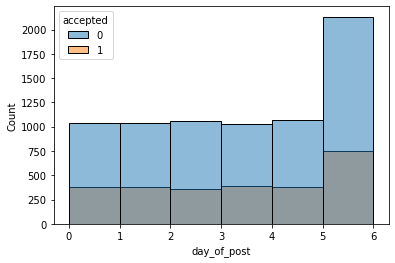

In [214]:
sns.histplot(data=jobs, x='day_of_post', hue='accepted', binwidth=1)
plt.show()

In [215]:
#Create a separate Data Frame for Acceptance Rate by Period of Post

acceptance_rate_by_period = jobs.groupby('period_of_post')['accepted'].mean().reset_index()

In [216]:
acceptedjobs = jobs['accepted'].isin([True])

In [217]:
jobs[acceptedjobs].head()

,time_of_post,latitude,longitude,category,number_of_tradies,estimated_size,number_of_impressions,accepted,hour_of_post,day_of_post,period_of_post
3,2019-09-10 11:38:06,-33.7674,151.1690,3,9732,medium,1111.0,1,11,1,Morning
8,2019-09-15 15:42:06,-38.0545,144.9955,7,3677,medium,1642.0,1,15,6,Afternoon
21,2019-09-15 14:49:06,-37.8261,144.9803,8,8376,small,1210.0,1,14,6,Afternoon
23,2019-09-13 16:09:06,-33.9457,151.1543,6,2476,medium,711.0,1,16,4,Afternoon
33,2019-09-14 14:28:06,-33.7730,151.1242,7,4242,medium,1180.0,1,14,5,Afternoon


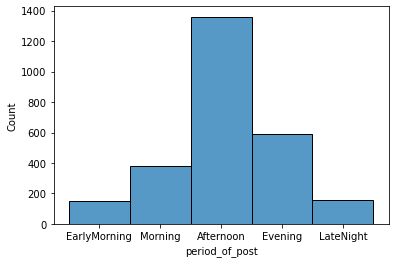

In [218]:
sns.histplot(data=jobs[acceptedjobs], x='period_of_post', binwidth=1)
plt.show()

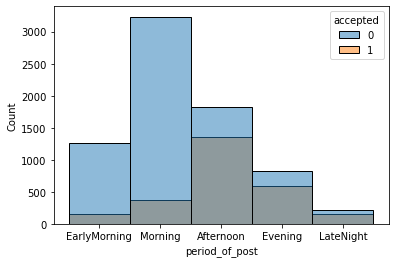

In [219]:
sns.histplot(data=jobs, x='period_of_post', hue='accepted', binwidth=1)
plt.show()

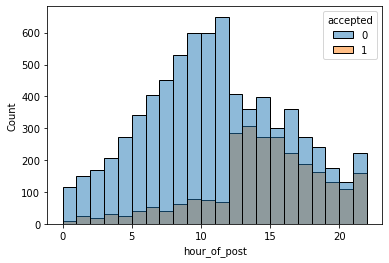

In [220]:
sns.histplot(data=jobs, x='hour_of_post', hue='accepted', binwidth=1)
plt.show()

In [221]:
pd.crosstab(jobs['accepted'], jobs['period_of_post'])

period_of_post,EarlyMorning,Morning,Afternoon,Evening,LateNight
accepted,,,,,
0,1256,3233,1828,824,222
1,150,378,1360,589,159


In [222]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(jobs['period_of_post'], jobs['accepted'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")

Chi-Square Statistic: 1301.7409168487643
P-Value: 1.3954451561758992e-280


In [223]:
# Create a contingency table
contingency_table = pd.crosstab(jobs['hour_of_post'], jobs['accepted'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")

Chi-Square Statistic: 1331.3962752601133
P-Value: 3.7200255483252157e-268


Reject the null hypothesis

The high Chi-Square statistic combined with the extremely low p-value provides strong evidence to reject the null hypothesis. This means we have a statistically significant reason to believe that the hour of posting does affect job acceptance rates.

In [224]:
#Encode time_category

jobs = pd.get_dummies(jobs, columns=['period_of_post'], prefix='OH')

jobs.head()

,time_of_post,latitude,longitude,category,number_of_tradies,estimated_size,number_of_impressions,accepted,hour_of_post,day_of_post,OH_EarlyMorning,OH_Morning,OH_Afternoon,OH_Evening,OH_LateNight
0,2019-09-15 11:40:06,-37.8994,144.9799,8,8376,medium,1004.0,0,11,6,0,1,0,0,0
1,2019-09-11 15:12:06,-37.8063,144.9964,3,5089,medium,772.0,0,15,2,0,0,1,0,0
2,2019-09-10 15:53:06,-37.8901,144.8885,7,3677,small,1103.0,0,15,1,0,0,1,0,0
3,2019-09-10 11:38:06,-33.7674,151.1690,3,9732,medium,1111.0,1,11,1,0,1,0,0,0
4,2019-09-10 17:38:06,-33.9091,151.2039,6,2476,small,360.0,0,17,1,0,0,0,1,0


<AxesSubplot:>

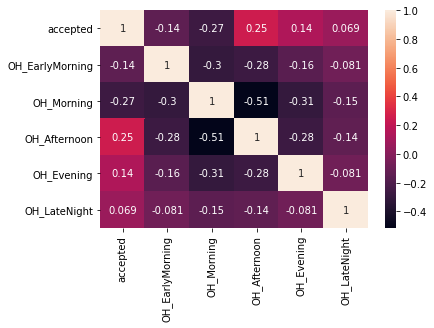

In [225]:
sns.heatmap(data=jobs[['accepted', 'OH_EarlyMorning', 'OH_Morning', 'OH_Afternoon', 'OH_Evening','OH_LateNight']].corr(), annot=True)

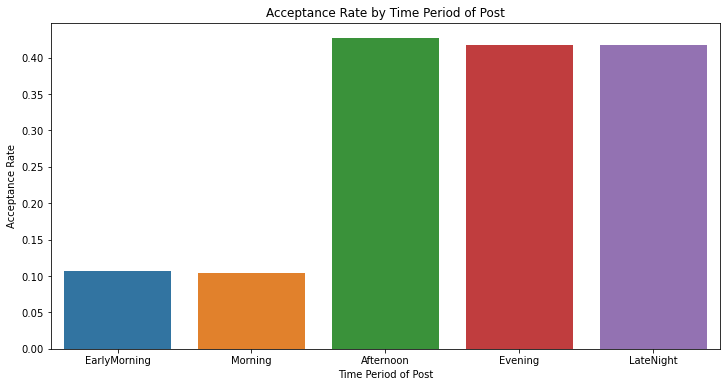

In [226]:

# Plot the acceptance rate by time period
plt.figure(figsize=(12, 6))
sns.barplot(data=acceptance_rate_by_period , x='period_of_post', y='accepted', order=['EarlyMorning', 'Morning', 'Afternoon', 'Evening', 'LateNight'])
plt.title('Acceptance Rate by Time Period of Post')
plt.xlabel('Time Period of Post')
plt.ylabel('Acceptance Rate')
plt.show()

In [227]:
#Create Cross Tabulation of Hour and Day of Post Acceptance Rate

pd.crosstab(jobs['day_of_post'], jobs['hour_of_post'], values=jobs['accepted'], aggfunc="mean")

hour_of_post,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
day_of_post,,,,,,,,,,,,,,,,,,,,,
0,0.142857,0.142857,0.057143,0.111111,0.086957,0.119403,0.132075,0.045455,0.095745,0.140187,...,0.546392,0.400000,0.357143,0.435897,0.500000,0.274510,0.489796,0.666667,0.441176,0.666667
1,0.055556,0.125000,0.062500,0.083333,0.146341,0.117647,0.186441,0.146667,0.118280,0.126437,...,0.425287,0.471154,0.460526,0.384615,0.368421,0.359375,0.368421,0.384615,0.360000,0.300000
2,0.043478,0.103448,0.107143,0.173913,0.000000,0.153846,0.163636,0.057471,0.162500,0.053763,...,0.443038,0.402299,0.469880,0.376471,0.419355,0.458333,0.434783,0.459459,0.400000,0.304348
3,0.133333,0.166667,0.218750,0.064516,0.042553,0.039216,0.109375,0.089552,0.111111,0.125000,...,0.418367,0.445652,0.475610,0.425287,0.359375,0.588235,0.372093,0.428571,0.419355,0.666667
4,0.041667,0.125000,0.064516,0.238095,0.057143,0.080645,0.073529,0.081967,0.093750,0.135417,...,0.495495,0.377551,0.477273,0.333333,0.414286,0.344262,0.395833,0.434783,0.419355,0.533333
5,0.000000,0.157895,0.055556,0.081081,0.151515,0.137931,0.082192,0.067568,0.089888,0.054348,...,0.418367,0.394231,0.462500,0.328947,0.328358,0.375000,0.521739,0.400000,0.411765,0.538462
6,0.200000,0.161290,0.037037,0.105263,0.125000,0.127273,0.091954,0.096774,0.086957,0.156250,...,0.459184,0.364583,0.629630,0.375000,0.478261,0.416667,0.361111,0.407407,0.250000,0.394737


<AxesSubplot:>

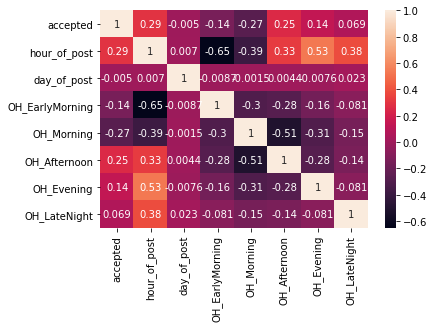

In [228]:
#Replotting the heatmap to include Day and Hour

sns.heatmap(data=jobs[['accepted','hour_of_post','day_of_post','OH_EarlyMorning','OH_Morning','OH_Afternoon','OH_Evening','OH_LateNight']].corr(), annot=True)

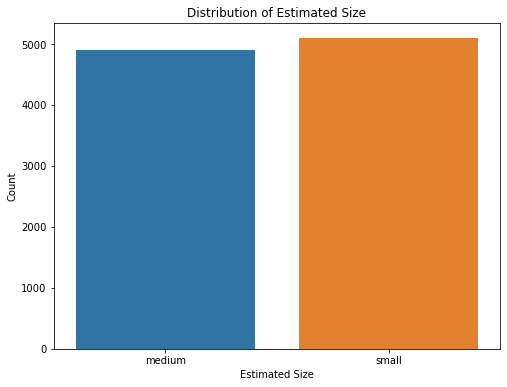

In [229]:
# Plot the distribution of estimated_size
plt.figure(figsize=(8, 6))
sns.countplot(data=jobs, x='estimated_size')
plt.title('Distribution of Estimated Size')
plt.xlabel('Estimated Size')
plt.ylabel('Count')
plt.show()

In [230]:
jobs['estimated_size'].value_counts()

small     5095
medium    4904
Name: estimated_size, dtype: int64

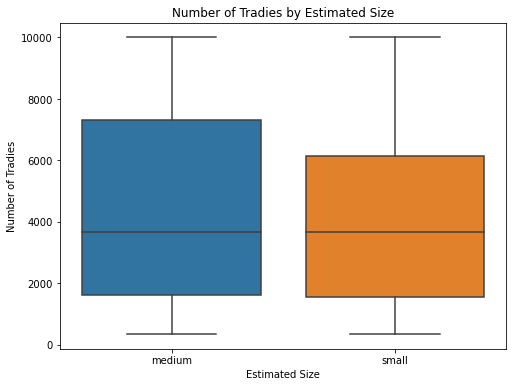

In [231]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='estimated_size', y='number_of_tradies', data=jobs)
plt.title('Number of Tradies by Estimated Size')
plt.xlabel('Estimated Size')
plt.ylabel('Number of Tradies')
plt.show()

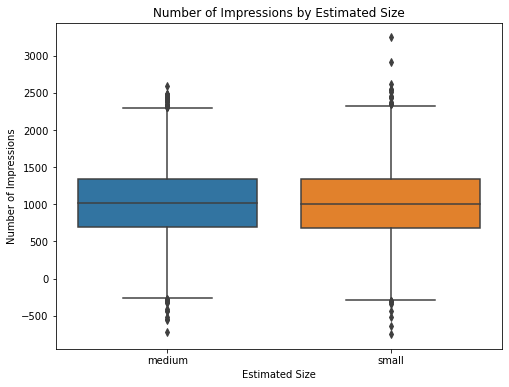

In [232]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='estimated_size', y='number_of_impressions', data=jobs)
plt.title('Number of Impressions by Estimated Size')
plt.xlabel('Estimated Size')
plt.ylabel('Number of Impressions')
plt.show()


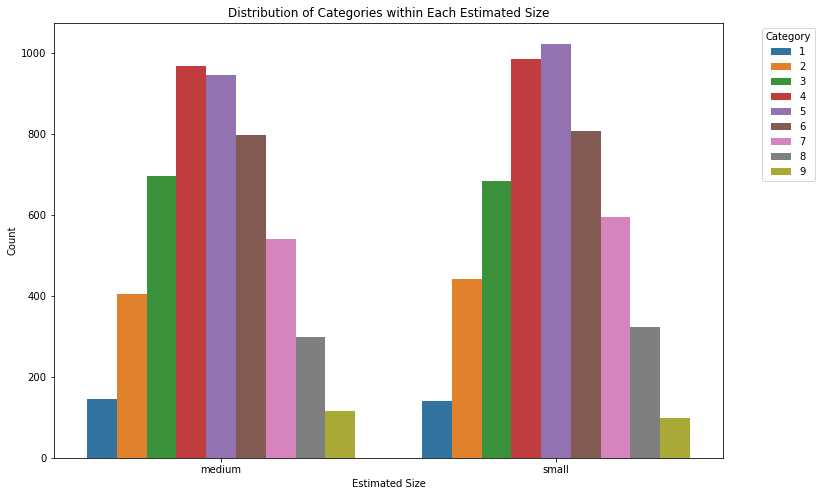

In [234]:
# Plot the stacked bar plot
plt.figure(figsize=(12, 8))
category_distribution = jobs.groupby(['estimated_size', 'category']).size().reset_index(name='counts')
sns.barplot(x='estimated_size', y='counts', hue='category', data=category_distribution)
plt.title('Distribution of Categories within Each Estimated Size')
plt.xlabel('Estimated Size')
plt.ylabel('Count')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [236]:
# Create a contingency table
contingency_table = pd.crosstab(jobs['estimated_size'], jobs['category'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-Square Statistic: 6.689127294284781
P-Value: 0.5705143684774714
Degrees of Freedom: 8
Expected frequencies:
[[ 140.75887589  414.42944294  675.83878388  957.35653565  964.22282228
   785.69936994  555.67876788  304.56885689  105.44654465]
 [ 146.24112411  430.57055706  702.16121612  994.64346435 1001.77717772
   816.30063006  577.32123212  316.43114311  109.55345535]]


In [187]:
jobs.head(50)

,time_of_post,latitude,longitude,category,number_of_tradies,estimated_size,number_of_impressions,accepted,hour_of_post,day_of_post,OH_EarlyMorning,OH_Morning,OH_Afternoon,OH_Evening,OH_LateNight
0,2019-09-15 11:40:06,-37.8994,144.9799,8,8376,medium,1004.0,0,11,6,0,1,0,0,0
1,2019-09-11 15:12:06,-37.8063,144.9964,3,5089,medium,772.0,0,15,2,0,0,1,0,0
2,2019-09-10 15:53:06,-37.8901,144.8885,7,3677,small,1103.0,0,15,1,0,0,1,0,0
3,2019-09-10 11:38:06,-33.7674,151.1690,3,9732,medium,1111.0,1,11,1,0,1,0,0,0
4,2019-09-10 17:38:06,-33.9091,151.2039,6,2476,small,360.0,0,17,1,0,0,0,1,0
5,2019-09-15 08:59:06,-33.8712,151.2583,5,355,medium,1531.0,0,8,6,0,1,0,0,0
6,2019-09-14 13:36:06,-37.8493,145.1805,3,5089,small,460.0,0,13,5,0,0,1,0,0
7,2019-09-11 17:54:06,-17.8442,122.1037,5,3590,medium,1025.0,0,17,2,0,0,0,1,0
8,2019-09-15 15:42:06,-38.0545,144.9955,7,3677,medium,1642.0,1,15,6,0,0,1,0,0
9,2019-09-16 13:44:06,-33.8440,151.1713,9,10000,small,1521.0,0,13,0,0,0,1,0,0


In [189]:
jobs[null_impressions].head(20)

,time_of_post,latitude,longitude,category,number_of_tradies,estimated_size,number_of_impressions,accepted,hour_of_post,day_of_post,OH_EarlyMorning,OH_Morning,OH_Afternoon,OH_Evening,OH_LateNight
40,2019-09-13 17:45:06,-37.7495,145.0112,7,3677,medium,NaN,1,17,4,0,0,0,1,0
134,2019-09-13 09:48:06,-37.7390,145.0099,5,1058,medium,NaN,0,9,4,0,1,0,0,0
144,2019-09-15 10:08:06,-37.7601,144.9879,4,5479,small,NaN,0,10,6,0,1,0,0,0
170,2019-09-12 08:24:06,-33.8774,151.2550,6,2476,medium,NaN,0,8,3,0,1,0,0,0
274,2019-09-10 00:51:06,-33.8854,151.2861,5,355,small,NaN,0,0,1,1,0,0,0,0
345,2019-09-14 06:14:06,-37.7702,144.9385,8,8376,small,NaN,0,6,5,0,1,0,0,0
511,2019-09-13 07:13:06,-37.7399,144.8365,6,8260,medium,NaN,0,7,4,0,1,0,0,0
695,2019-09-10 11:28:06,-33.7663,151.2583,5,355,small,NaN,0,11,1,0,1,0,0,0
731,2019-09-10 21:45:06,-37.8472,144.7247,8,8376,small,NaN,0,21,1,0,0,0,0,1
871,2019-09-11 02:14:06,-33.9112,151.1675,8,1627,small,NaN,0,2,2,1,0,0,0,0


In [190]:
filtered_df = jobs[jobs['number_of_impressions'] < 0]

In [191]:
filtered_df.groupby('estimated_size')['number_of_impressions'].value_counts()

estimated_size  number_of_impressions
medium          -184.0                   2
                -140.0                   2
                -85.0                    2
                -82.0                    2
                -51.0                    2
                                        ..
small           -17.0                    1
                -12.0                    1
                -11.0                    1
                -4.0                     1
                -1.0                     1
Name: number_of_impressions, Length: 119, dtype: int64

In [192]:
jobs['number_of_impressions'].describe()

count    9889.000000
mean     1015.828901
std       481.730727
min      -745.000000
25%       689.000000
50%      1007.000000
75%      1339.000000
max      3245.000000
Name: number_of_impressions, dtype: float64

In [193]:
jobs['impressed'] = 0

In [194]:
jobs.loc[jobs['number_of_impressions']>1, 'impressed'] = 1